In [69]:
Analysis

There is clearly a correlation between average fare price and the city 
type where the ride takes place.  The farther from the city center you 
are, the more expensive, on average, your ride will be.

Additionally, there is significanly more demand for rides the closer to
the city center you are. 

Possibly because of the observation listed above, there are significantly 
more drivers in urban areas than suburban and rural, respectively.  But
it should be noted that there is a higher percentage of drivers in urban
areas than the other two areas. 

NameError: name 'Analysis' is not defined

In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#Read City data
city_df = pd.read_csv(city_data_to_load)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [8]:
#read ride data
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [9]:
#combine data and display into data table for preview
combined_df = pd.merge(city_df, ride_df)
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [10]:
#drop duplicates to make df neater
no_duplicates_df = combined_df.drop_duplicates('city')
no_duplicates_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
51,Port Angela,67,Urban,2018-04-17 06:23:18,16.34,7120534266772
70,Rodneyfort,34,Urban,2018-02-10 23:22:03,23.44,5149245426178
93,West Robert,39,Urban,2018-02-15 04:21:47,12.28,1442502460354


In [11]:
#avg fare per city
avg_fare = combined_df.groupby('city')['fare'].mean()
avg_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [12]:
#total number of rides per city
total_rides = combined_df.groupby('city')['ride_id'].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [13]:
#total drivers per city
drivers_total = combined_df.groupby('city')['driver_count'].mean()
drivers_total.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [14]:
#determining city type
city_types = no_duplicates_df.set_index('city')['type']
city_types.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [15]:
#creating DF of cities
cities_df = pd.DataFrame({'Average Fare ($)': avg_fare, 
                          'Total Number of Rides (per City)':total_rides,
                          'City Types': city_types,
                         'Driver Count': drivers_total})
cities_df.head()

,Average Fare ($),Total Number of Rides (per City),City Types,Driver Count
Amandaburgh,24.641667,18,Urban,12
Barajasview,25.332273,22,Urban,26
Barronchester,36.422500,16,Suburban,11
Bethanyland,32.956111,18,Suburban,22
Bradshawfurt,40.064000,10,Rural,7


In [64]:
graph_data = pd.merge(city_df,ride_df, on = 'city')
graph_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [65]:
#grouping into types of cities
urban = graph_data.loc[ graph_data['type']== 'Urban']
suburban =  graph_data.loc[ graph_data['type']== 'Suburban']
rural =  graph_data.loc[ graph_data['type']== 'Rural']
#urban.head()
#suburban.head()
rural.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [55]:
grouped_urban = urban.groupby('city')
grouped_suburban = suburban.groupby('city')
grouped_rural = rural.groupby('city'
                             )
avg_fare_urban = grouped_urban['fare'].mean()
avg_fare_urban.head()

avg_fare_suburban = grouped_suburban['fare'].mean()
#avg_fare_suburban.head()

avg_fare_rural = grouped_rural['fare'].mean()
#avg_fare_rural.head()

avg_fare_urban.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

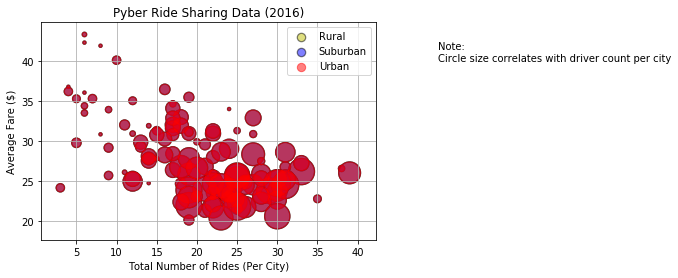

In [68]:
#Building the scatter plot
plt.scatter(cities_df['Total Number of Rides (per City)'], 
cities_df['Average Fare ($)'], color = 'y', edgecolor = 'k', 
linewidth = 1.25, s = cities_df['Driver Count'] * 10
,label = 'Rural', alpha = 0.5)

plt.scatter(cities_df['Total Number of Rides (per City)'], 
cities_df['Average Fare ($)'],
color = 'b', edgecolor = 'k', linewidth = 1.25,
s = cities_df['Driver Count'] * 10, label = 'Suburban', alpha = 0.5)

plt.scatter(cities_df['Total Number of Rides (per City)'], 
cities_df['Average Fare ($)'], color = 'r', linewidth =1,
label = 'Urban', s = cities_df['Driver Count'] * 10,
alpha = 0.5)

#starting the process of making the plot pretty
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.text(50,40, 'Note:\nCircle size correlates with driver count per city')

#adding and editting the legend
legend = plt.legend(loc = 'best')
legend.legendHandles[0]._sizes = [70]
legend.legendHandles[1]._sizes = [70]
legend.legendHandles[2]._sizes = [70]


#adding a grid and showing the plot
plt.grid()

#save picture
plt.savefig('../Images/Pyber_Images/Pyber_Images_file.png')

plt.show()

#not sure why it won't show multiple colors.  This current plot is useless
#I think my mistake is that I am having all 3 sections calling from 
#cities_df when they should have there own data to call from. 
#I tried for linger than I would like to admit to try to fix the issue,
#but to no avail.

In [57]:
#Calculate Type Percents
pie = combined_df.groupby(['type'])['fare'].sum()
#pie

pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

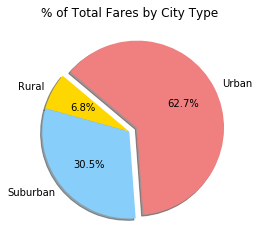

In [81]:
#Build Pie Chart
plt.pie(pie, labels = pie.index, colors = ['gold','lightskyblue','lightcoral'],
        explode = (0,0,0.1), shadow = True, autopct = '%1.1f%%',
        startangle = 140)


plt.title('% of Total Fares by City Type')

#save picture
plt.savefig('../Images/Pyber_Images/Pyber_Images_file.png')

plt.show()




In [35]:
#Calculate Ride Percents
ride_pie = combined_df.groupby(['type'])['ride_id'].count()
ride_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

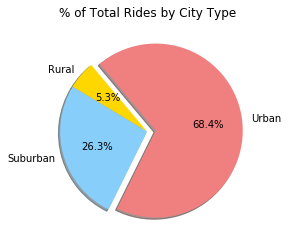

In [79]:
#Build Pie Chart
plt.pie(ride_pie, labels = ride_pie.index, colors = ['gold','lightskyblue','lightcoral'],
        explode = (0,0,0.1), shadow = True, autopct = '%1.1f%%',
        startangle = 130)


plt.title('% of Total Rides by City Type')

#save picture
plt.savefig('../Images/Pyber_Images/Pyber_Images_file.png')

plt.show()



In [91]:
#Calculate Driver Percents
drivers_pie = combined_df.groupby(['type'])['driver_count'].sum()
drivers_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

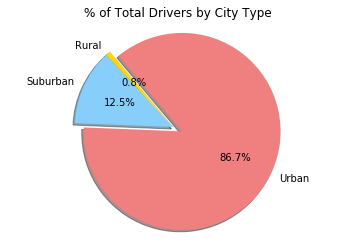

In [92]:
#Build Pie Charts
plt.pie(drivers_pie, labels = drivers_pie.index, colors = ['gold','lightskyblue','lightcoral'],
        explode = (0,0,0.1), shadow = True, autopct = '%1.1f%%',
        startangle = 130)


plt.axis('equal')
plt.title('% of Total Drivers by City Type')

#Save Figure
plt.savefig('../Images/Pyber_Images/Pyber_Images_file.png')

plt.show()
